In [173]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from beautifultable import BeautifulTable

In [6]:
df = pd.read_csv("C:/Users/Yidow/Desktop/CS767/Assignment_3/Assignment_3_Hitters.csv")
print(df)

            Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0       -Andy Allanson    293    66      1    30   29     14      1     293   
1          -Alan Ashby    315    81      7    24   38     39     14    3449   
2         -Alvin Davis    479   130     18    66   72     76      3    1624   
3        -Andre Dawson    496   141     20    65   78     37     11    5628   
4    -Andres Galarraga    321    87     10    39   42     30      2     396   
..                 ...    ...   ...    ...   ...  ...    ...    ...     ...   
317      -Willie McGee    497   127      7    65   48     37      5    2703   
318   -Willie Randolph    492   136      5    76   50     94     12    5511   
319    -Wayne Tolleson    475   126      3    61   43     52      6    1700   
320     -Willie Upshaw    573   144      9    85   60     78      8    3198   
321     -Willie Wilson    631   170      9    77   44     31     11    4908   

     CHits  ...  CRuns  CRBI  CWalks  League Divisi

In [10]:
print (df.dtypes)

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object


In [31]:
# data cleaning and set number for str column
df = df.dropna()
df['League'] = df['League'].apply(ord)
df['NewLeague'] = df['NewLeague'].apply(ord)
df['Division'] = df['Division'].apply(ord)

In [32]:
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,78,87,632,43,10,475.0,78
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,65,87,880,82,14,480.0,65
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,78,69,200,11,3,500.0,78
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,78,69,805,40,4,91.5,78
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,65,87,282,421,25,750.0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,78,69,325,9,3,700.0,78
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,65,69,313,381,20,875.0,65
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,65,87,37,113,7,385.0,65
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,65,69,1314,131,12,960.0,65


In [47]:
x = df.drop(['Unnamed: 0', 'Salary'], axis=1)
y = df['Salary']
x = np.array(x)
y = np.array(y)

In [58]:
def LeakyReLU(z):
    y = np.maximum(0.05*z, z)
    return y

In [74]:
def learningRate(lr, decay, epoch):
    for i in range(epoch):
        lr = lr * 1/(1 + decay * i)

    return lr

In [116]:
learningRate(0.00001, 0.0000001, 50)

9.99877507704918e-06

In [41]:
max_ite = 20

In [163]:
# Use the code from my Assignment 2
def batchGradientDescent(x, y, learning_rate, L, lamb):
    MSE = []
    tht0 = np.random.rand(19)
    tht1 = 0
    for i in range(max_ite):
        pre = np.array(np.dot(tht0.T, x.T) + tht1)
        leaky = LeakyReLU(pre)
        tmp = y - leaky
        tht0 = tht0 - learning_rate * (-(2 / x.shape[0]) * (x.T.dot(tmp)))
        tht1 = tht1 - learning_rate * (-(2 / x.shape[0]) * np.sum(tmp))
        regularizations = 0
        if(L == 1):
            regularizations = lamb * sum(abs(leaky))
        if(L == 2):
            regularizations = (lamb/2) * sum(np.square(leaky))
        e = np.mean(np.square(y - leaky)) + regularizations
        MSE.append(e)

    return e, MSE, tht0

In [164]:
e_1, MSE_1, weight = batchGradientDescent(x, y, 0.01, -1, 0)
e_2, MSE_2, weight = batchGradientDescent(x, y, 0.001, -1, 0)
e_3, MSE_3, weight = batchGradientDescent(x, y, 0.0001, -1, 0)
e_4, MSE_4, weight = batchGradientDescent(x, y, 0.00001, -1, 0)
e_5, MSE_5, weight = batchGradientDescent(x, y, 0.000001, -1, 0)
e_6, MSE_6, weight = batchGradientDescent(x, y, 0.0000001, -1, 0)
e_7, MSE_7, weight = batchGradientDescent(x, y, 0.00000001, -1, 0)

In [166]:
type(weight)

numpy.ndarray

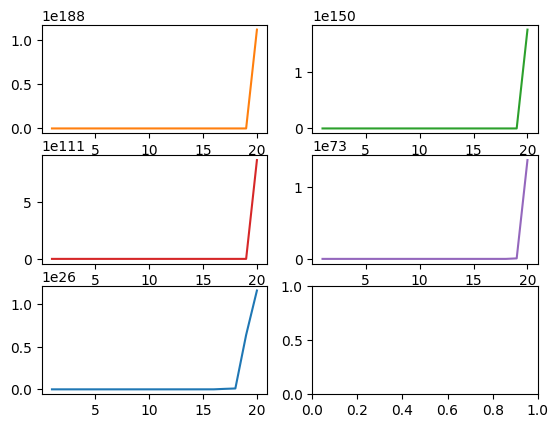

In [145]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(list(range(1,21)), MSE_1, 'tab:orange')
axs[0, 1].plot(list(range(1,21)), MSE_2, 'tab:green')
axs[1, 0].plot(list(range(1,21)), MSE_3, 'tab:red')
axs[1, 1].plot(list(range(1,21)), MSE_4, 'tab:purple')
axs[2, 0].plot(list(range(1,21)), MSE_5)

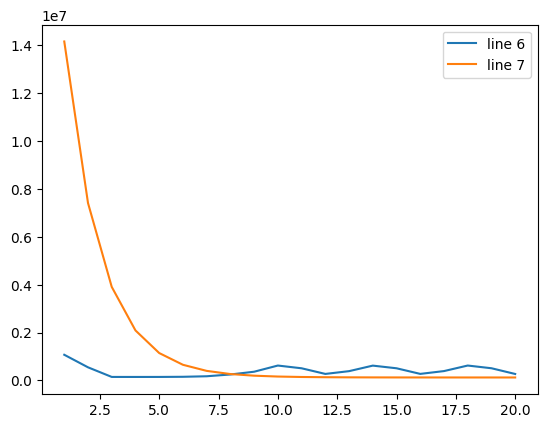

In [146]:
plt.plot(list(range(1,21)), MSE_6, label = "line 6")
plt.plot(list(range(1,21)), MSE_7, label = "line 7")
plt.legend()
plt.show()

In [168]:
# Lasso Regression
e_lasso_1, MSE_lasso_1, weight_lasso_1 = batchGradientDescent(x, y, 0.00000001, 1, 0.01)
e_lasso_2, MSE_lasso_2, weight_lasso_2 = batchGradientDescent(x, y, 0.00000001, 1, 10)

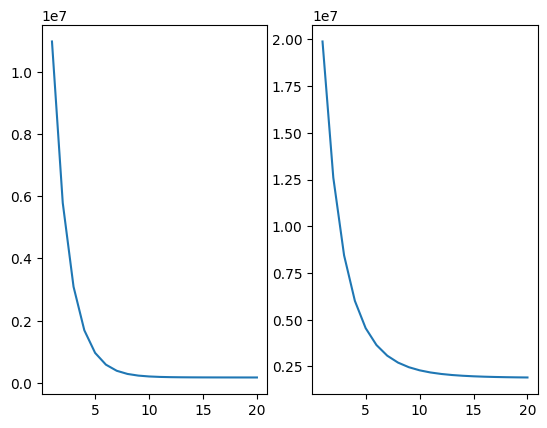

In [160]:
fig, (axs1, axs2) = plt.subplots(1, 2)
axs1.plot(list(range(1,21)), MSE_lasso_1)
axs2.plot(list(range(1,21)), MSE_lasso_2)

In [170]:
# L2
e_l2_1, MSE_l2_1, weight_l2_1 = batchGradientDescent(x, y, 0.00000001, 2, 0.01)
e_l2_2, MSE_l2_2, weight_l2_2 = batchGradientDescent(x, y, 0.00000001, 2, 10)

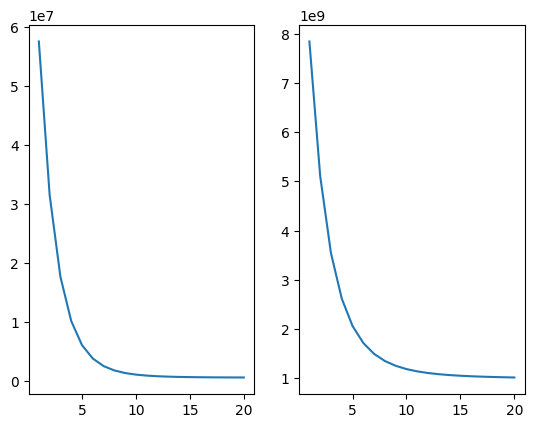

In [162]:
fig, (axs1, axs2) = plt.subplots(1, 2)
axs1.plot(list(range(1,21)), MSE_l2_1)
axs2.plot(list(range(1,21)), MSE_l2_2)

In [178]:
table = BeautifulTable()
table.columns.append(weight)
table.columns.append(weight_l2_1)
table.columns.append(weight_l2_2)
table.columns.append(weight_lasso_1)
table.columns.append(weight_lasso_2)
table.columns.header = ["W/out reg", "L2 0.01", "L2 10", "Lasso 0.01", "Lasso2 10"]
print(table)

+-----------+---------+--------+------------+-----------+
| W/out reg | L2 0.01 | L2 10  | Lasso 0.01 | Lasso2 10 |
+-----------+---------+--------+------------+-----------+
|   0.504   |  0.469  | 0.344  |   0.596    |  -0.029   |
+-----------+---------+--------+------------+-----------+
|   0.585   |  0.478  | -0.023 |   0.709    |   0.867   |
+-----------+---------+--------+------------+-----------+
|   0.604   |  0.902  | 0.466  |   0.287    |   0.237   |
+-----------+---------+--------+------------+-----------+
|   0.559   |  0.288  | 0.358  |   0.581    |   0.549   |
+-----------+---------+--------+------------+-----------+
|   0.781   |  0.482  | 0.277  |   0.126    |   0.797   |
+-----------+---------+--------+------------+-----------+
|   0.266   |  0.995  | 0.403  |   0.591    |   0.456   |
+-----------+---------+--------+------------+-----------+
|   0.179   |  0.219  | 0.642  |   0.127    |   0.831   |
+-----------+---------+--------+------------+-----------+
|  -0.423   | 